In [14]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [15]:
import IPython.display as ipd
import librosa
import matplotlib.pyplot as plt

from src.audio_modifications import (
    AmplitudeMultiplier,
    CustomNoiseInserter,
    GaussianNoiseInserter,
    Subsampler,
)

# Load and display audio files


In [16]:
audio_file = "audio/male.wav"
cafe_audio_file = "audio/cafe.wav"

## Speech


In [17]:
file_array, sample_rate = librosa.load(audio_file, sr=None)
display(ipd.Audio(file_array, rate=sample_rate))

print(f"File array: {file_array}, type: {type(file_array)}")
print(f"Sample rate: {sample_rate}, type: {type(sample_rate)}")

File array: [0. 0. 0. ... 0. 0. 0.], type: <class 'numpy.ndarray'>
Sample rate: 48000, type: <class 'int'>


## Custom background noise


In [18]:
cafe_file_array, cafe_sample_rate = librosa.load(cafe_audio_file, sr=None)
cafe_file_array = librosa.resample(
    cafe_file_array, orig_sr=cafe_sample_rate, target_sr=sample_rate
)
cafe_sample_rate = sample_rate
display(
    ipd.Audio(cafe_file_array, rate=cafe_sample_rate),
)

print(f"File array: {cafe_file_array}, type: {type(cafe_file_array)}")
print(f"Sample rate: {cafe_sample_rate}, type: {type(cafe_sample_rate)}")

File array: [ 0.0262065   0.02419834  0.01509753 ...  0.00072581 -0.00766198
 -0.00958421], type: <class 'numpy.ndarray'>
Sample rate: 48000, type: <class 'int'>


# Amplitude multiplier test


It seems that the IPython player normalizes the sounds, so the perceived volume will be the same for all of them.
The y axis on 3 plots will be different though.


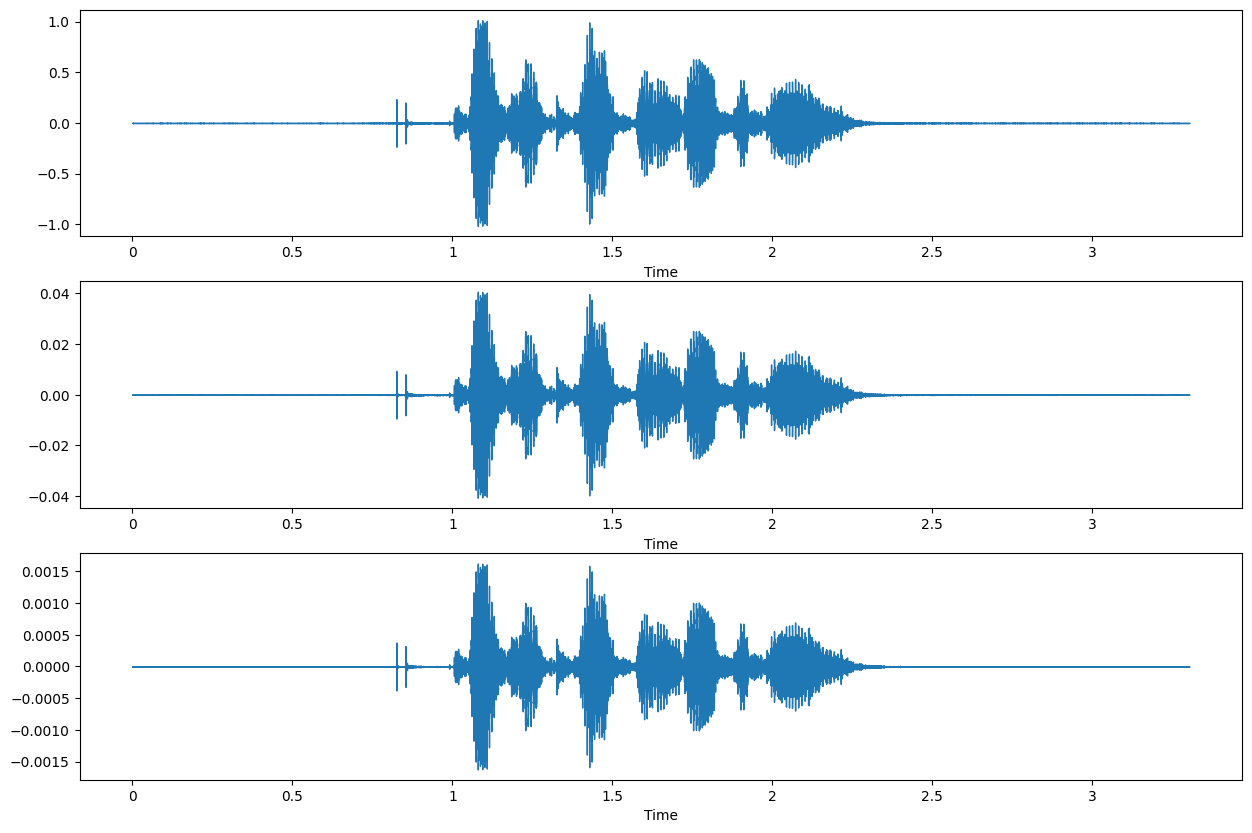

In [19]:
fig, ax = plt.subplots(3, 1, figsize=(15, 10))

processors = [
    AmplitudeMultiplier(25),
    AmplitudeMultiplier(1),
    AmplitudeMultiplier(0.04),
]
print(
    "It seems that the IPython player normalizes the sounds, so the \
perceived volume will be the same for all of them.\n\
The y axis on 3 plots will be different though."
)
for index, processor in enumerate(processors):
    modified_array, modified_sample_rate = processor.process(file_array, sample_rate)
    librosa.display.waveshow(modified_array, sr=modified_sample_rate, ax=ax[index])
    audio = ipd.Audio(modified_array, rate=modified_sample_rate)
    assert librosa.util.valid_audio(modified_array)
    display(audio)

# Subsampler test


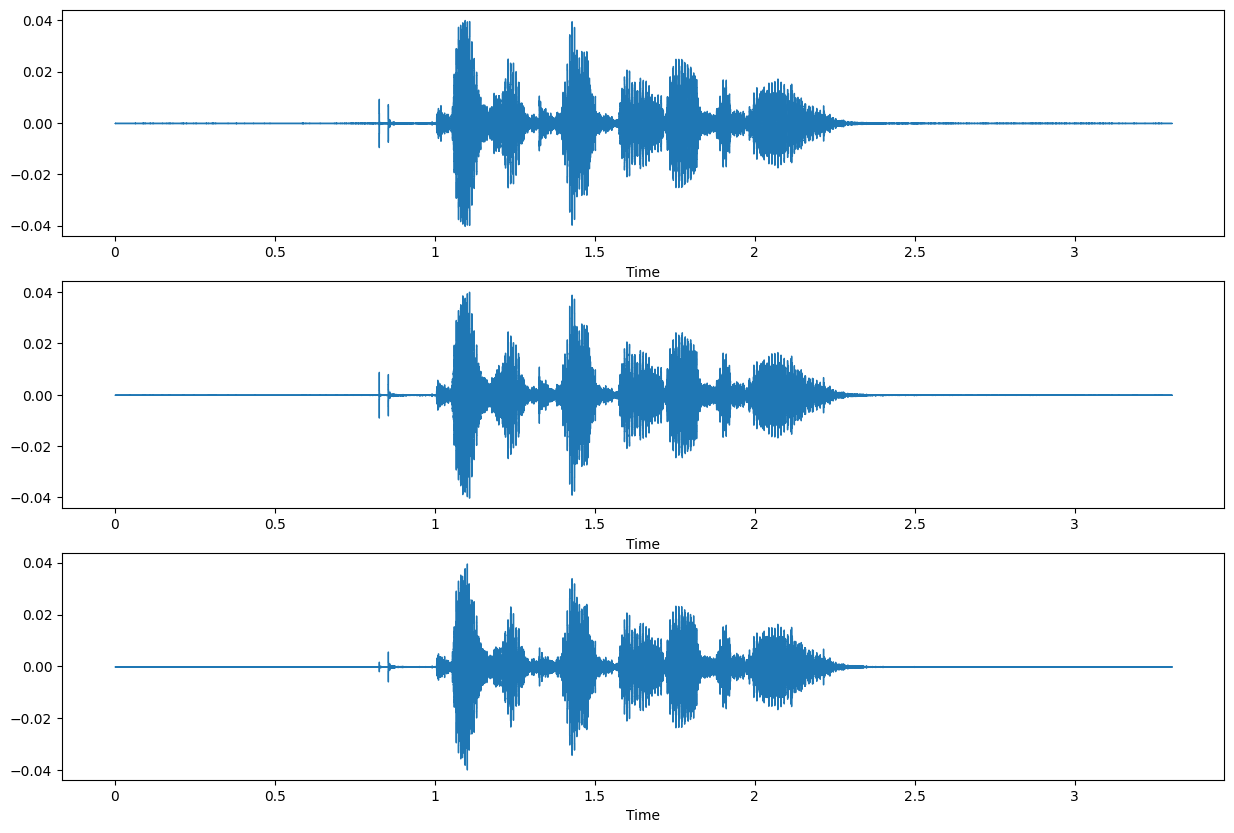

In [20]:
subsamplers = [Subsampler(divisor=2), Subsampler(divisor=5), Subsampler(divisor=10)]

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

for index, processor in enumerate(subsamplers):
    modified_array, modified_sample_rate = processor.process(file_array, sample_rate)
    librosa.display.waveshow(modified_array, sr=modified_sample_rate, ax=ax[index])
    audio = ipd.Audio(modified_array, rate=modified_sample_rate)
    assert librosa.util.valid_audio(modified_array)
    display(audio)

# Gaussian noise inserter test


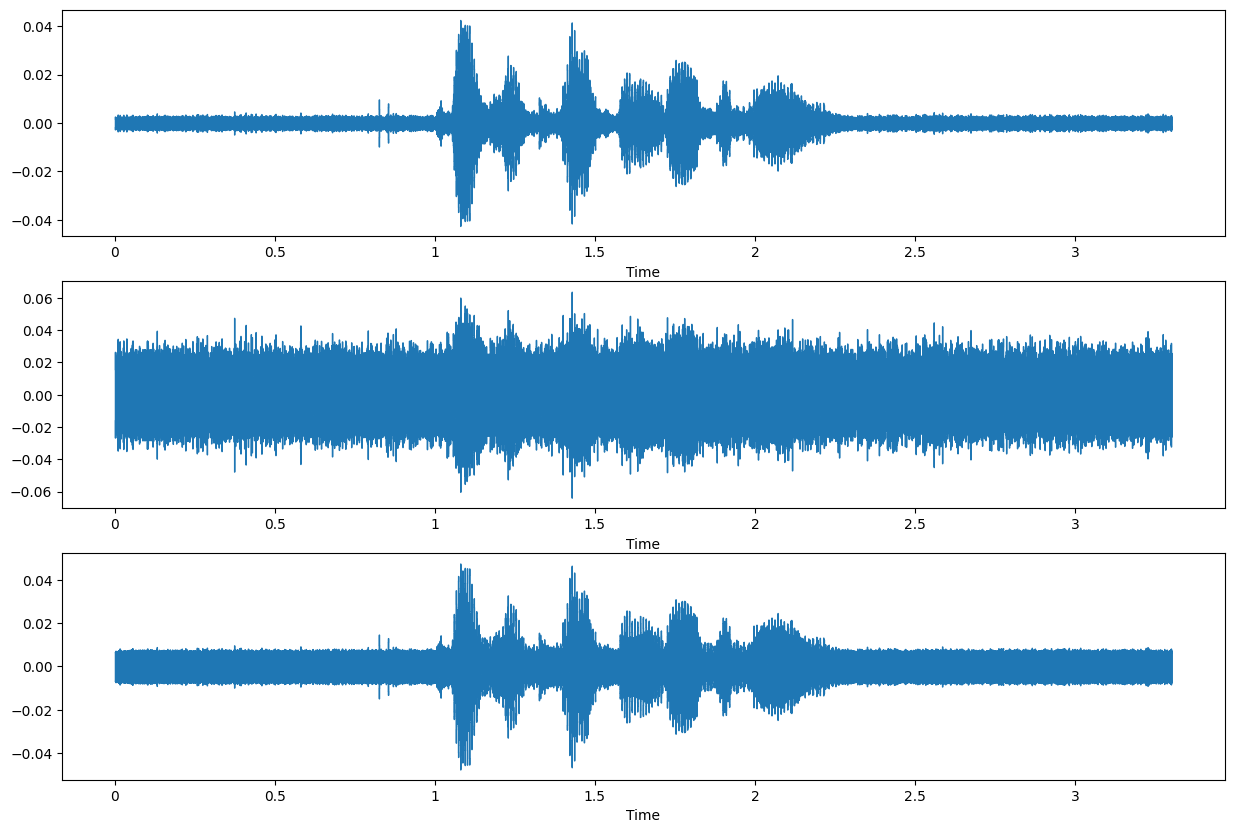

In [21]:
g_noise_inserters = [
    GaussianNoiseInserter(mean=0, std=1, noise_factor=0.001, random_state=11),
    GaussianNoiseInserter(mean=0, std=10, noise_factor=0.001, random_state=11),
    GaussianNoiseInserter(mean=5, std=1, noise_factor=0.001, random_state=11),
]

fig, ax = plt.subplots(3, 1, figsize=(15, 10))

for index, processor in enumerate(g_noise_inserters):
    modified_array, modified_sample_rate = processor.process(file_array, sample_rate)
    librosa.display.waveshow(modified_array, sr=modified_sample_rate, ax=ax[index])
    audio = ipd.Audio(modified_array, rate=modified_sample_rate)
    assert librosa.util.valid_audio(modified_array)
    display(audio)

# Custom noise inserter test


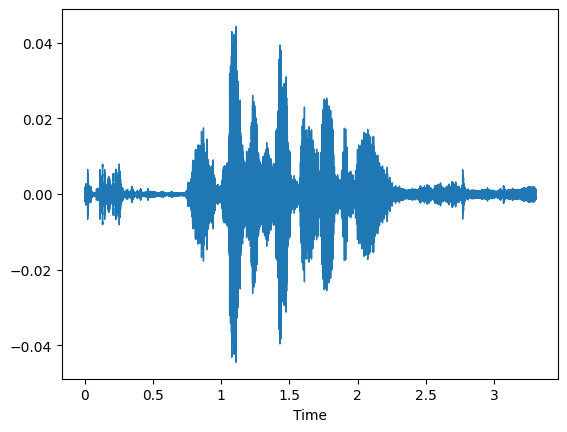

In [22]:
noise_inserter = CustomNoiseInserter(cafe_file_array)

modified_array, modified_sample_rate = noise_inserter.process(file_array, sample_rate)

display(ipd.Audio(modified_array, rate=modified_sample_rate))

librosa.display.waveshow(modified_array, sr=modified_sample_rate)